### Simulate the Monty Hall Problem

- Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?
 
 - What would happen if you had 100 doors to choose from and the presenter opens 98 or them?
 
- And what if you had $N$ doors to choose from and the presenter opens $M\leq N-2$ of them? Study how the probability of winning changes as a function of $M$ and $N$.

In [1]:
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

- 0 = Conservative
- 1 = Switcher
- 2 = Newcommer

In [2]:
def games(N, M, player):
    indeces = np.arange(N, dtype=int)  #Indices of doors
    car = np.random.choice(N, 1)  #Choising the index of the door behind which there is the car
    choice = np.random.choice(N, 1)  #Choise of the player
    remaining_indeces = np.delete(indeces, [car, choice])  #Removing both the door of the car and the door chosen by the player
    avalaible_indeces = np.delete(indeces, remaining_indeces[:M])  #Openig M doors
    if player == 1: 
        choice = np.random.choice(avalaible_indeces[avalaible_indeces!=choice])  #Switching the door
    if player == 2:
        choice = np.random.choice(avalaible_indeces)  #Choice of the newcommer
    if choice == car:
        return 1  #Win
    else:
        return 0  #Lose

In [33]:
N = 3  #Number of doors
M = 1  #Number of doors that have to be open
N_games = 100000  #Number of games played
results =  np.zeros((3, N_games))
for j in range(3):
    for i in tqdm(range(N_games)):
        results[j][i] = games(N, M, j)
wins = [len(results[0][results[0]==1])/N_games,  #Computing the probabilities
        len(results[1][results[1]==1])/N_games,
        len(results[2][results[2]==1])/N_games]

100%|██████████| 100000/100000 [00:12<00:00, 7847.50it/s]


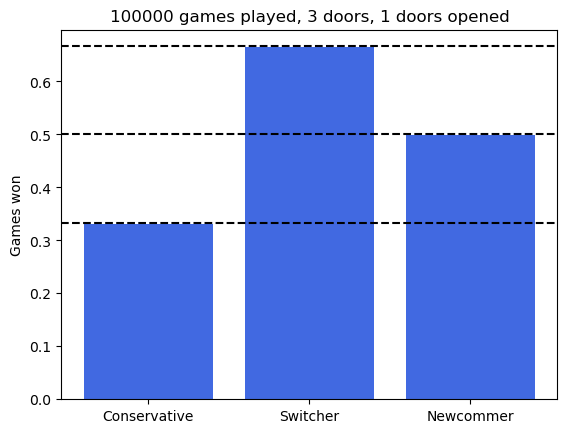

In [34]:
#Plotting the results
expected_result = [1/N,(N-1)/(N*(N-1-M)),1/(N-M)]  #Expected results
players = ['Conservative', 'Switcher', 'Newcommer']
plt.bar(players, wins, color = 'royalblue')
plt.title('%i games played, %i doors, %i doors opened' %(N_games, N, M))
for e in expected_result:
    plt.axhline(e, ls='--', c='black')
plt.ylabel('Games won')
plt.show()